In [45]:
import pandas as pd
import matplotlib.pyplot as plt 
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent 
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
#load enviroment
load_dotenv()

True

In [46]:
import sys
sys.path.append("D:/DADuckShop/dagpt")
from src.models.llms import load_llm

MODEL_NAME = "gpt-3.5-turbo"
llm = load_llm(model_name= MODEL_NAME)
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000001BB4F8D7530>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001BB4F946E70>, root_client=<openai.OpenAI object at 0x000001BB4F672490>, root_async_client=<openai.AsyncOpenAI object at 0x000001BB4F767750>, temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********'), max_tokens=1000)

In [47]:
llm.invoke("Hello. Who are you ?")

AIMessage(content='Hello! I am an AI digital assistant here to help you with any questions or tasks you may have. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 13, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BHvxyC9JFLecDx7z41xC14KwIro5z', 'finish_reason': 'stop', 'logprobs': None}, id='run-bd60b1f2-2884-44c3-b11f-13a3d0c65683-0', usage_metadata={'input_tokens': 13, 'output_tokens': 29, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [48]:
 
df = pd.read_csv("D:/DADuckShop/dagpt/data/raw/fashion_shop_revenue.csv")

da_agent = create_pandas_dataframe_agent(
        llm = llm,
        df = df,
        agent_type = "tool-calling",
        allow_dangerous_code = True,
        verbose = True,
        return_intermediate_steps =True,
    )
da_agent

AgentExecutor(verbose=True, agent=RunnableMultiActionAgent(runnable=RunnableAssign(mapper={
  agent_scratchpad: RunnableLambda(lambda x: message_formatter(x['intermediate_steps']))
})
| ChatPromptTemplate(input_variables=['agent_scratchpad', 'input'], input_types={'agent_scratchpad': list[typing.Annotated[typing.Union[typing.Annotated[langchain_core.messages.ai.AIMessage, Tag(tag='ai')], typing.Annotated[langchain_core.messages.human.HumanMessage, Tag(tag='human')], typing.Annotated[langchain_core.messages.chat.ChatMessage, Tag(tag='chat')], typing.Annotated[langchain_core.messages.system.SystemMessage, Tag(tag='system')], typing.Annotated[langchain_core.messages.function.FunctionMessage, Tag(tag='function')], typing.Annotated[langchain_core.messages.tool.ToolMessage, Tag(tag='tool')], typing.Annotated[langchain_core.messages.ai.AIMessageChunk, Tag(tag='AIMessageChunk')], typing.Annotated[langchain_core.messages.human.HumanMessageChunk, Tag(tag='HumanMessageChunk')], typing.Annotated[l

In [ ]:
query = "Describe this data"
response = da_agent(query)



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': 'df.describe()'}`


         Quantity     Unit Price  Total Revenue
count  100.000000     100.000000   1.000000e+02
mean     2.950000  418000.000000   1.249000e+06
std      1.305582  194562.446157   8.787612e+05
min      1.000000  200000.000000   2.000000e+05
25%      2.000000  300000.000000   7.500000e+05
50%      3.000000  400000.000000   1.000000e+06
75%      4.000000  500000.000000   1.600000e+06
max      5.000000  800000.000000   4.000000e+06The data contains information on Quantity, Unit Price, and Total Revenue for different products. Here is a summary of the data:

- Quantity:
  - The average quantity sold is approximately 2.95.
  - The minimum quantity sold is 1 and the maximum is 5.
  - The standard deviation of the quantity is approximately 1.31.

- Unit Price:
  - The average unit price is 418,000.
  - The minimum unit price is 200,000 and the maximum is 800,000.
  - The standard deviation 

In [50]:
print(response["intermediate_steps"][-1][0].tool_input['query'])

df.describe()




> Entering new AgentExecutor chain...


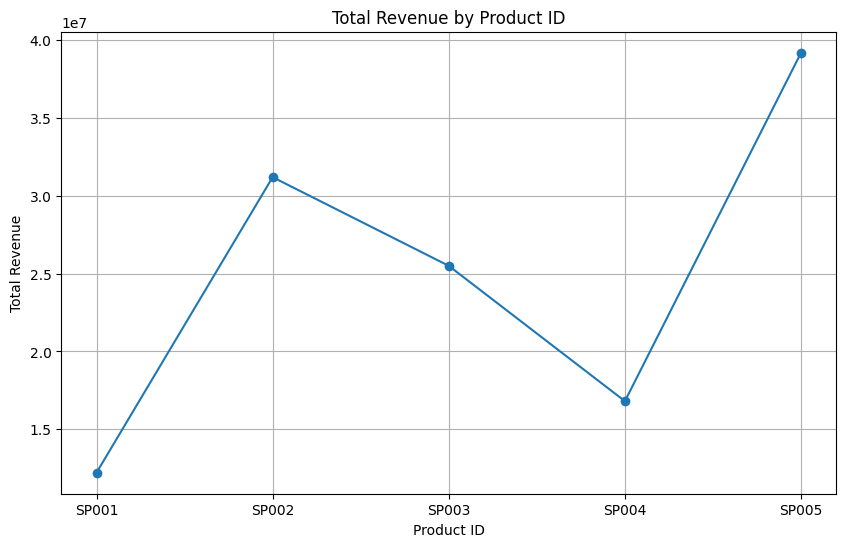


Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nimport pandas as pd\n\n# Grouping the dataframe by Product ID and summing the Total Revenue\nrevenue_by_product = df.groupby('Product ID')['Total Revenue'].sum().reset_index()\n\n# Plotting the scatter plot and connecting the points with a line\nplt.figure(figsize=(10, 6))\nplt.plot(revenue_by_product['Product ID'], revenue_by_product['Total Revenue'], marker='o', linestyle='-')\nplt.xlabel('Product ID')\nplt.ylabel('Total Revenue')\nplt.title('Total Revenue by Product ID')\nplt.grid(True)\nplt.show()"}`


Here is the scatter plot of Product ID and the sum of Total Revenue with the points connected by a line. Each point represents the total revenue for a specific product ID.

> Finished chain.


In [51]:
query = "plot scatter plot of Product ID and sum Total Revenue (nối các điểm thành một đường đi) "
response = da_agent(query)

In [52]:
print(response["intermediate_steps"][-1][0].tool_input['query'])

import matplotlib.pyplot as plt
import pandas as pd

# Grouping the dataframe by Product ID and summing the Total Revenue
revenue_by_product = df.groupby('Product ID')['Total Revenue'].sum().reset_index()

# Plotting the scatter plot and connecting the points with a line
plt.figure(figsize=(10, 6))
plt.plot(revenue_by_product['Product ID'], revenue_by_product['Total Revenue'], marker='o', linestyle='-')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Product ID')
plt.grid(True)
plt.show()
